In [1]:
pip install ftfy

     |████████████████████████████████| 71kB 5.9MB/s 
  Created wheel for ftfy: filename=ftfy-6.0.3-cp37-none-any.whl size=41935 sha256=1d0675c08d40fa06bca70bf91190456848b8219486246157c61b515817c738a1
  Stored in directory: /root/.cache/pip/wheels/99/2c/e6/109c8a28fef7a443f67ba58df21fe1d0067ac3322e75e6b0b7
Successfully built ftfy


In [2]:
# Importing the necessary liabries 

import re
import nltk
import string
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pandas as pd
import seaborn as sns
from ftfy import *

In [3]:
from google.colab import files
data_to_load = files.upload()

Saving input_data.csv to input_data.csv


In [4]:
import io
df = pd.read_csv(io.BytesIO(data_to_load['input_data.csv']))

In [5]:
#Let us load the Data 

df = pd.read_csv("input_data.csv")

In [6]:
#Lets look at the data so that we get a deeper understand of the rows and columns 

df.head(10)

Short description  ... Assignment group
0                                        login issue  ...            GRP_0
1                                            outlook  ...            GRP_0
2                                 cant log in to vpn  ...            GRP_0
3                      unable to access hr_tool page  ...            GRP_0
4                                       skype error   ...            GRP_0
5     unable to log in to engineering tool and skype  ...            GRP_0
6  event: critical:HostName_221.company.com the v...  ...            GRP_1
7  ticket_no1550391- employment status - new non-...  ...            GRP_0
8               unable to disable add ins on outlook  ...            GRP_0
9                    ticket update on inplant_874773  ...            GRP_0

[10 rows x 4 columns]

We see that the we've got a Dataset with 4 colums where the 'Assignment group' is the Dependent column and the other 3 are the independent columns.

Now lets dig deeper into the above Dataset 

In [7]:
#Let us look at the shape of the data given to us
df.shape

(8500, 4)

This tells us that the Dataset has 8500 rows divided across 4 columns

In [8]:
#Lets check for missing values in the Dataset 

pd.DataFrame(df.isnull().sum(), columns=["Number of Missing Values"])

Number of Missing Values
Short description                         8
Description                               1
Caller                                    0
Assignment group                          0

In [9]:
#Lets look at these Data points within the Dataset contaning missing vlaues

df[df.isnull().any(axis=1)]

Short description  ... Assignment group
2604                       NaN  ...           GRP_34
3383                       NaN  ...            GRP_0
3906                       NaN  ...            GRP_0
3910                       NaN  ...            GRP_0
3915                       NaN  ...            GRP_0
3921                       NaN  ...            GRP_0
3924                       NaN  ...            GRP_0
4341                       NaN  ...            GRP_0
4395  i am locked out of skype  ...            GRP_0

[9 rows x 4 columns]

In [10]:
df.tail()

Short description  ... Assignment group
8495                  emails not coming in from zz mail  ...           GRP_29
8496                           telephony_software issue  ...            GRP_0
8497  vip2: windows password reset for tifpdchb pedx...  ...            GRP_0
8498                     machine nÃ£o estÃ¡ funcionando  ...           GRP_62
8499  an mehreren pc`s lassen sich verschiedene prgr...  ...           GRP_49

[5 rows x 4 columns]

In [11]:
df.shape

(8500, 4)

In [12]:
comparison_column = np.where(df['Short description'] == df['Description'])

In [13]:
len(comparison_column[0])

2862

In [14]:
df.dtypes

Short description    object
Description          object
Caller               object
Assignment group     object
dtype: object

In [15]:
# Converting datatype\

df = df.applymap(str)

In [16]:
df['Complete_Description'] = " "


In [17]:
for index, row in df.iterrows():
  row['Complete_Description'] = row['Description'] + " " + row['Short description']
  if index in comparison_column[0]:
    row['Complete_Description'] = row['Description']
  df.loc[index,'Complete_Description'] = row['Complete_Description']


In [18]:
df.tail()

Short description  ...                               Complete_Description
8495                  emails not coming in from zz mail  ...  _x000D_\n_x000D_\nreceived from: avglmrts.vhqm...
8496                           telephony_software issue  ...                           telephony_software issue
8497  vip2: windows password reset for tifpdchb pedx...  ...  vip2: windows password reset for tifpdchb pedx...
8498                     machine nÃ£o estÃ¡ funcionando  ...  i am unable to access the machine utilities to...
8499  an mehreren pc`s lassen sich verschiedene prgr...  ...  an mehreren pc`s lassen sich verschiedene prgr...

[5 rows x 5 columns]

As we've got null values in the given Dataset we have combined the 'short description' and 'Description' Columns to avoid dropping the null values. 

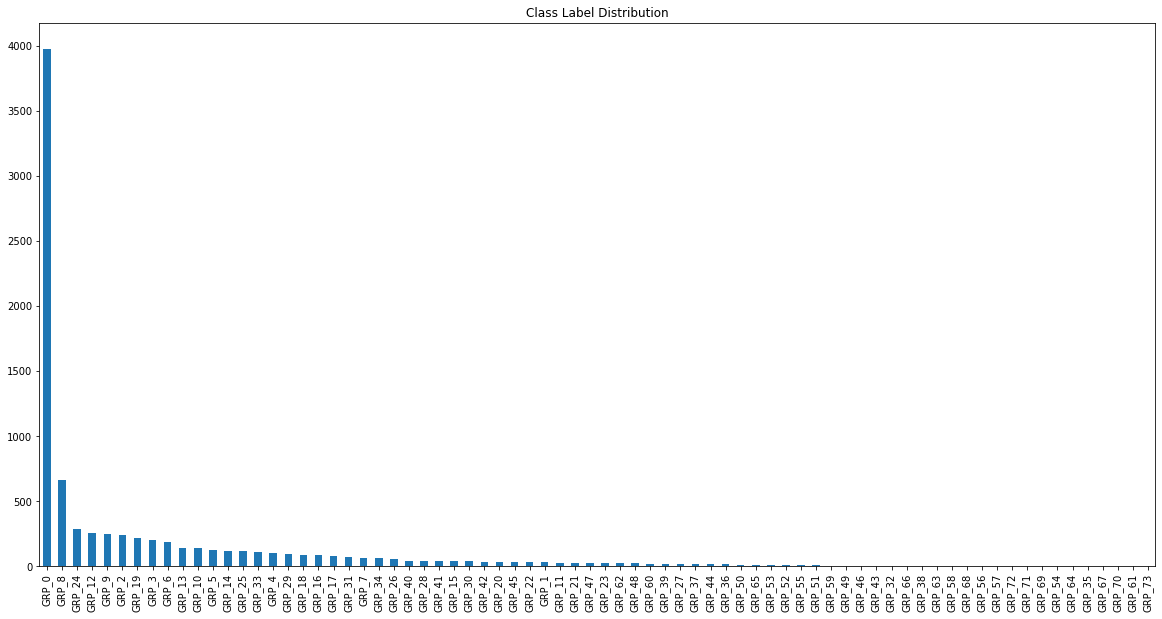

In [19]:
# Assignment group distribution

df['Assignment group'].value_counts().plot(kind='bar', figsize=(20,10), title='Class Label Distribution');

The above chart clearly shows that the "GRP_0" assignment has the biggest chunk of data

In [20]:
df['Assignment group'].value_counts().head(60)

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
GRP_2      241
GRP_19     215
GRP_3      200
GRP_6      184
GRP_13     145
GRP_10     140
GRP_5      129
GRP_14     118
GRP_25     116
GRP_33     107
GRP_4      100
GRP_29      97
GRP_18      88
GRP_16      85
GRP_17      81
GRP_31      69
GRP_7       68
GRP_34      62
GRP_26      56
GRP_40      45
GRP_28      44
GRP_41      40
GRP_15      39
GRP_30      39
GRP_42      37
GRP_20      36
GRP_45      35
GRP_22      31
GRP_1       31
GRP_11      30
GRP_21      29
GRP_47      27
GRP_23      25
GRP_62      25
GRP_48      25
GRP_60      20
GRP_39      19
GRP_27      18
GRP_37      16
GRP_44      15
GRP_36      15
GRP_50      14
GRP_65      11
GRP_53      11
GRP_52       9
GRP_55       8
GRP_51       8
GRP_59       6
GRP_49       6
GRP_46       6
GRP_43       5
GRP_32       4
GRP_66       4
GRP_38       3
GRP_63       3
Name: Assignment group, dtype: int64

In [21]:
def clearstring(data, reg_ex):
    return data.str.lower().str.replace(reg_ex.lower(), ' ')

def clearstring(data, reg_ex):
    return data.str.lower().str.replace(reg_ex.lower(), ' ')


def Regex_list():
    
    regex_list = []
    regex_list += ['[^a-zA-z 0-9]+'] 
    regex_list += ['From:(.*)\r\n']    
    regex_list += ['received from:(.*)\r\n']  
    regex_list += ['received'] 
    regex_list += ['Sent:(.*)\r\n']
    regex_list += ['To:(.*)\r\n']
    regex_list += ["  "] 
    regex_list += ['CC:(.*)\r\n'] 
    regex_list += ['https?:[^\]\n\r]+']  
    regex_list += ['[\w\d\-\_\.]+@[\w\d\-\_\.]+'] 
    regex_list += ['[0-9][\-0–90-9 ]+']  
    regex_list += ['[0-9]']  
    regex_list += ['[\r\n]']  
    regex_list += [' [a-zA-Z] ']  
    regex_list += [' [a-zA-Z][a-zA-Z] ']  
    regex_list += ['^[_a-z0-9-]+(\.[_a-z0-9-]+)*@[a-z0-9-]+(\.[a-z0-9-]+)*(\.[a-z]{2,4})$']
    regex_list += ['[\w\d\-\_\.]+ @ [\w\d\-\_\.]+']
    regex_list += ['Subject:']
    regex_list += ['[^a-zA-Z]']
    regex_list += ['^\w@gmail\.com$']

    return regex_list


def cleanData(dataset, column, regex_list):
    for reg_ex in regex_list:
        dataset[column] = clearstring(dataset[column], reg_ex)
    return dataset


In [22]:
# Clean dataset Complete_Description

cleanData(df, 'Complete_Description', Regex_list())


Short description  ...                               Complete_Description
0                                           login issue  ...   verified user details employee  manager name ...
1                                               outlook  ...   d d  from hmjdrvpb komuaywn gmail com d d hel...
2                                    cant log in to vpn  ...   d d  from eylqgodm ybqkwiam gmail com d d d d...
3                         unable to access hr_tool page  ...                            unable access tool page
4                                          skype error   ...                                       skype error 
...                                                 ...  ...                                                ...
8495                  emails not coming in from zz mail  ...   d d  from avglmrts vhqmtiua gmail com d d goo...
8496                           telephony_software issue  ...                           telephony software issue
8497  vip2: windows password reset for tifpdchb pedx...  ...   vip windows password reset for tifpdchb pedxruyf
8498                     machine nÃ£o estÃ¡ funcionando  ...  i unable access the machine utilities finish t...
8499  an mehreren pc`s lassen sich verschiedene prgr...  ...  an mehreren lassen sich verschiedene prgramdnt...

[8500 rows x 5 columns]

In [23]:
df['Complete_Description'] = df.apply(lambda x: x['Complete_Description'].replace(x['Caller'], ""), axis=1)


In [24]:
pattern = re.compile('(gmail|com)')
df['Complete_Description']=df['Complete_Description'].apply(lambda x: re.sub(pattern, "",x))

In [25]:
df.head()

Short description  ...                               Complete_Description
0                    login issue  ...   verified user details employee  manager name ...
1                        outlook  ...   d d  from    d d hello team d d meetings skyp...
2             cant log in to vpn  ...   d d  from    d d d d cannot log to vpn d d be...
3  unable to access hr_tool page  ...                            unable access tool page
4                   skype error   ...                                       skype error 

[5 rows x 5 columns]

In [26]:
df['Short description'] = df['Short description'].apply(fix_text)
df['Description'] = df['Description'].apply(fix_text)
df['Complete_Description'] = df['Complete_Description'].apply(fix_text)

In the above steps we have cleared the Dataset given to us by converting the text to lowercase, removing any special characters, removing any form of numeric values etc.

In [27]:
nltk.download('all')
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('averaged_perceptron_tagger')
#stop_words = set(stopwords.words('english'))

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [28]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords,wordnet
from nltk.stem.porter import PorterStemmer 
from nltk.stem import WordNetLemmatizer

In [29]:
stop_words = set(stopwords.words('english'))
processed_all_documents = []
for row in df['Complete_Description']:
    word_tokens = word_tokenize(row)

    filtered_sentence = [] 

    # Removing Stopwords
    
    for X in word_tokens: 
        if X not in stop_words: 
            filtered_sentence.append(X)


    
    # Lemmetization
    
    lemma_word = []
    wordnet_lemmatizer = WordNetLemmatizer()
    for X in filtered_sentence:
        word = wordnet_lemmatizer.lemmatize(X)
        lemma_word.append(word)
    words = ' '.join(lemma_word)
    processed_all_documents.append(words)

In [30]:
df['Complete_Description'] = processed_all_documents

In [31]:
df.head(10)

Short description  ...                               Complete_Description
0                                        login issue  ...  verified user detail employee manager name che...
1                                            outlook  ...  hello team meeting skype meeting etc appearing...
2                                 cant log in to vpn  ...                          log vpn best cant log vpn
3                      unable to access hr_tool page  ...                            unable access tool page
4                                       skype error   ...                                        skype error
5     unable to log in to engineering tool and skype  ...                  unable log engineering tool skype
6  event: critical:HostName_221.company.com the v...  ...  event critical hostname pany value mountpoint ...
7  ticket_no1550391- employment status - new non-...  ...  ticket employment status new non employee ente...
8               unable to disable add ins on outlook  ...                      unable disable add in outlook
9                    ticket update on inplant_874773  ...                              ticket update inplant

[10 rows x 5 columns]

In the above few steps we have removed the stops words and lemmatized the Complete_Description column

In [32]:
#Lets look at the distribution of Assignmnet Group based on calller 

df['Caller'].value_counts().head(40)

bpctwhsn kzqsbmtp    810
ZkBogxib QsEJzdZO    151
fumkcsji sarmtlhy    134
rbozivdq gmlhrtvp     87
rkupnshb gsmzfojw     71
jloygrwh acvztedi     64
spxqmiry zpwgoqju     63
oldrctiu bxurpsyi     57
olckhmvx pcqobjnd     54
jyoqwxhz clhxsoqy     51
dkmcfreg anwmfvlg     51
efbwiadp dicafxhv     45
afkstcev utbnkyop     32
gzhapcld fdigznbk     30
mnlazfsr mtqrkhnx     28
uvrbhlnt bjrmalzi     27
entuakhp xrnhtdmk     25
jionmpsf wnkpzcmv     24
vzqomdgt jwoqbuml     24
bozdftwx smylqejw     23
qasdhyzm yuglsrwx     21
utyeofsk rdyzpwhi     21
rxoynvgi ntgdsehl     21
vbwszcqn nlbqsuyv     19
hbmwlprq ilfvyodx     17
ugyothfz ugrmkdhx     17
vfrdxtqw jfbmsenz     16
ughzilfm cfibdamq     16
niptbwdq csenjruz     16
pfzxecbo ptygkvzl     16
mfeyouli ndobtzpw     15
uxgrdjfc kqxdjeov     15
xwirzvda okhyipgr     14
ctvaejbo mjcerqwo     14
tqfnalpj qyoscnge     13
aorthyme rnsuipbk     13
wktesmbp lorjymef     13
obanjrhg rnafleys     13
zuxcfonv nyhpkrbe     12
rdfjsawg zpmxgdcw     12


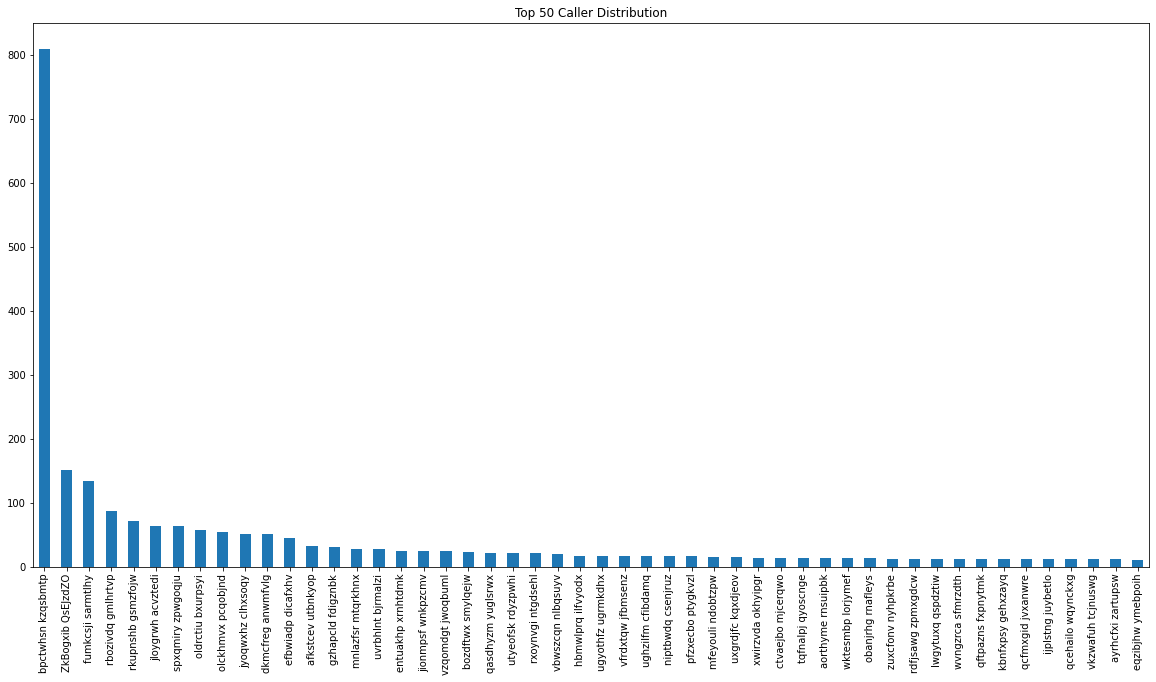

In [33]:
df['Caller'].value_counts().head(50).plot(kind='bar', figsize=(20,10), title='Top 50 Caller Distribution')

In [34]:
df.loc[df.Caller == 'bpctwhsn kzqsbmtp','Assignment group'].value_counts()

GRP_8     362
GRP_9     153
GRP_5      96
GRP_6      89
GRP_10     60
GRP_60     16
GRP_12      8
GRP_45      7
GRP_1       6
GRP_13      4
GRP_18      3
GRP_47      2
GRP_57      1
GRP_14      1
GRP_29      1
GRP_44      1
Name: Assignment group, dtype: int64

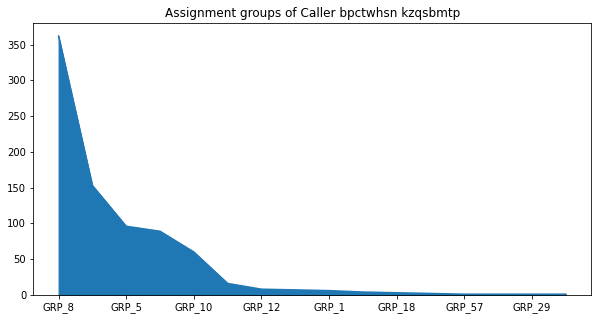

In [35]:
df.loc[df.Caller == 'bpctwhsn kzqsbmtp','Assignment group'].value_counts().plot(kind='area', figsize=(10,5), title='Assignment groups of Caller bpctwhsn kzqsbmtp')

In [58]:
pip install google_trans_new

In [61]:
#Translating all the other languages in the Complete Description into English

from google_trans_new import google_translator

translator = google_translator()

In [60]:
for index, row in df.iterrows():
  row['Complete_Description'] = translator.translate(row['Complete_Description'],lang_tgt='en')
  df.loc[index,'Complete_Description'] = row['Complete_Description']



In [62]:
#Lets concatenate the Assignmnet group so that we get one big chuck of Description for a particular Group.

Group_list = df['Assignment group'].unique()
combined_groups = {}

for x in Group_list:
    if x not in combined_groups:
        combined_groups[x] = ".".join(df[df['Assignment group'] == x]['Complete_Description'].values)
    

In [63]:
combined_groups

{'GRP_0': "verified user detail employee manager name checked user name ad reset password advised user login check caller confirmed able login issue resolved login issue .hello team meeting skype meeting etc appearing outlook calendar somebody please advise correct kind outlook .log vpn best cant log vpn .unable access tool page .skype error .unable log engineering tool skype .ticket employment status new non employee enter user name .unable disable add in outlook .ticket update implant .engineering tool say connected unable submit report .hr tool site loading page correctly .unable login hr tool sgxqsuojr xwbesorf card .user want reset password .unable open payslip .ticket update implant .xyz pany unable login pany vpn website trying open new session using link able get pls help urgently working home tomorrow due month end closing unable login pany vpn .erp sid account locked .unable sign vpn .unable check payslip .hello helpdesk able connect vpn home office couple hour ago connected 

In [122]:
df1 = pd.DataFrame(list(combined_groups.items()))

In [123]:
df1.head(10)

0                                                  1
0   GRP_0  verified user detail employee manager name che...
1   GRP_1  event critical hostname pany value mountpoint ...
2   GRP_3  undocking screen e back .internal keybankrd wo...
3   GRP_4  gentles two device trying share ip address try...
4   GRP_5  printer printer working need part replaced rer...
5   GRP_6  monitoring tool pany job job failed job schedu...
6   GRP_7  closing call agent keep acd call status status...
7   GRP_8  monitoring tool pany job zscr dly merktc faile...
8   GRP_9  monitoring tool pany job job failed job schedu...
9  GRP_10  monitoring tool pany job payroll failed job sc...

In [124]:
df1.columns = ['Assignment group', 'Combined_Description']

In [125]:
df1.head(5)

Assignment group                               Combined_Description
0            GRP_0  verified user detail employee manager name che...
1            GRP_1  event critical hostname pany value mountpoint ...
2            GRP_3  undocking screen e back .internal keybankrd wo...
3            GRP_4  gentles two device trying share ip address try...
4            GRP_5  printer printer working need part replaced rer...

The above dataframe contains the concatenated Assignment Groups and their Descriptions

### TFIDF vectorizer using bigrams and dimensionality reduction using PCA

#### Importing libraries

In [126]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse
from itertools import combinations

In [127]:
tfidf = TfidfVectorizer(ngram_range=(2,2))
tfidf.fit(df1['Combined_Description'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(2, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [128]:
desc_vector = tfidf.transform(df1['Combined_Description'])

In [129]:
type(desc_vector.toarray())

numpy.ndarray

In [130]:
desc_vector.shape

(74, 69870)

In [131]:
df_tfidf = pd.DataFrame(desc_vector.todense())

In [132]:
df_tfidf['Group'] = df1['Assignment group']

In [133]:
df_tfidf.head()

0    1    2         3    4  ...  69866  69867     69868  69869  Group
0  0.0  0.0  0.0  0.001223  0.0  ...    0.0    0.0  0.001223    0.0  GRP_0
1  0.0  0.0  0.0  0.000000  0.0  ...    0.0    0.0  0.000000    0.0  GRP_1
2  0.0  0.0  0.0  0.000000  0.0  ...    0.0    0.0  0.000000    0.0  GRP_3
3  0.0  0.0  0.0  0.000000  0.0  ...    0.0    0.0  0.000000    0.0  GRP_4
4  0.0  0.0  0.0  0.000000  0.0  ...    0.0    0.0  0.000000    0.0  GRP_5

[5 rows x 69871 columns]

In [134]:
np.array(df_tfidf.drop(columns=['Group']))[1]

array([0., 0., 0., ..., 0., 0., 0.])

#### Dimensionality reduction using PCA



In [135]:
# lda = LDA(n_components=15)
# df_lda = lda.fit_transform(df_tfidf.drop(columns=['Group']),df_tfidf['Group'])
# df_lda = pd.DataFrame(df_lda)

In [136]:
pca = PCA(0.9)
pca.fit(df_tfidf.drop(columns=['Group']))
variance = pca.explained_variance_ratio_
var = np.cumsum(np.round(variance,decimals = 3)*100)

In [137]:
var

array([ 6. ,  9.5, 11.8, 14. , 16. , 18. , 19.8, 21.5, 23.2, 24.9, 26.5,
       28. , 29.5, 31. , 32.5, 34. , 35.5, 36.9, 38.3, 39.7, 41.1, 42.5,
       43.9, 45.3, 46.7, 48.1, 49.5, 50.9, 52.3, 53.7, 55.1, 56.5, 57.9,
       59.3, 60.7, 62.1, 63.5, 64.9, 66.3, 67.7, 69. , 70.3, 71.6, 72.9,
       74.2, 75.5, 76.8, 78.1, 79.4, 80.6, 81.8, 83. , 84.2, 85.4, 86.6,
       87.8, 88.9, 90. , 91.1])

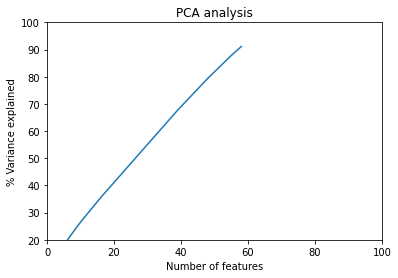

In [138]:
plt.ylabel("% Variance explained")
plt.xlabel("Number of features")
plt.title("PCA analysis")
plt.ylim(20,100)
plt.xlim(0,100)
plt.plot(var);

In [139]:
principalComponents = pca.transform(df_tfidf.drop(columns=['Group']))
df_pca = pd.DataFrame(principalComponents)

In [140]:
df_pca['Group'] = df_tfidf['Group']

In [141]:
len(df_pca['Group'].unique())

74

In [142]:
col_comb = [i for i in combinations(df_pca['Group'],2)]
print(col_comb)

[('GRP_0', 'GRP_1'), ('GRP_0', 'GRP_3'), ('GRP_0', 'GRP_4'), ('GRP_0', 'GRP_5'), ('GRP_0', 'GRP_6'), ('GRP_0', 'GRP_7'), ('GRP_0', 'GRP_8'), ('GRP_0', 'GRP_9'), ('GRP_0', 'GRP_10'), ('GRP_0', 'GRP_11'), ('GRP_0', 'GRP_12'), ('GRP_0', 'GRP_13'), ('GRP_0', 'GRP_14'), ('GRP_0', 'GRP_15'), ('GRP_0', 'GRP_16'), ('GRP_0', 'GRP_17'), ('GRP_0', 'GRP_18'), ('GRP_0', 'GRP_19'), ('GRP_0', 'GRP_2'), ('GRP_0', 'GRP_20'), ('GRP_0', 'GRP_21'), ('GRP_0', 'GRP_22'), ('GRP_0', 'GRP_23'), ('GRP_0', 'GRP_24'), ('GRP_0', 'GRP_25'), ('GRP_0', 'GRP_26'), ('GRP_0', 'GRP_27'), ('GRP_0', 'GRP_28'), ('GRP_0', 'GRP_29'), ('GRP_0', 'GRP_30'), ('GRP_0', 'GRP_31'), ('GRP_0', 'GRP_33'), ('GRP_0', 'GRP_34'), ('GRP_0', 'GRP_35'), ('GRP_0', 'GRP_36'), ('GRP_0', 'GRP_37'), ('GRP_0', 'GRP_38'), ('GRP_0', 'GRP_39'), ('GRP_0', 'GRP_40'), ('GRP_0', 'GRP_41'), ('GRP_0', 'GRP_42'), ('GRP_0', 'GRP_43'), ('GRP_0', 'GRP_44'), ('GRP_0', 'GRP_45'), ('GRP_0', 'GRP_46'), ('GRP_0', 'GRP_47'), ('GRP_0', 'GRP_48'), ('GRP_0', 'GRP_49'), 

In [143]:
len(col_comb)

2701

In [144]:
df_pca[df_pca['Group'] == 'GRP_0']

0         1        2         3  ...        56        57        58  Group
0 -0.139956 -0.138576 -0.15804  0.282186  ...  0.049578  0.019718 -0.001883  GRP_0

[1 rows x 60 columns]

In [145]:
def find_cosine_val(data,col_combinations,threshold):
  cosine_score = {}
  for pair in col_combinations:
    score = cosine_similarity(df_pca[df_pca['Group'] == pair[0]].iloc[:,:-1],df_pca[df_pca['Group'] == pair[1]].iloc[:,:-1])
    if score >= threshold:
      cosine_score[pair] = score[0][0]
  return cosine_score

In [146]:
threshold = 0.7
cosine_scores = find_cosine_val(df_pca.iloc[:,:-1],col_comb,threshold)
cosine_scores

{('GRP_0', 'GRP_17'): 0.7838290061773322,
 ('GRP_10', 'GRP_47'): 0.765625326126794,
 ('GRP_10', 'GRP_60'): 0.9749575487045873,
 ('GRP_12', 'GRP_2'): 0.7576212653041258,
 ('GRP_19', 'GRP_56'): 0.9773071395253474,
 ('GRP_3', 'GRP_12'): 0.8496080640618379,
 ('GRP_3', 'GRP_2'): 0.8059452435079429,
 ('GRP_4', 'GRP_8'): 0.8985230988296325,
 ('GRP_47', 'GRP_60'): 0.8005434467857547,
 ('GRP_5', 'GRP_10'): 0.9637457741603751,
 ('GRP_5', 'GRP_47'): 0.8786065270940169,
 ('GRP_5', 'GRP_6'): 0.973315707156557,
 ('GRP_5', 'GRP_60'): 0.9797167601006274,
 ('GRP_5', 'GRP_9'): 0.974519276841174,
 ('GRP_50', 'GRP_69'): 0.7955729442292384,
 ('GRP_6', 'GRP_10'): 0.9688949395102939,
 ('GRP_6', 'GRP_47'): 0.8368026747703498,
 ('GRP_6', 'GRP_60'): 0.9677894699452562,
 ('GRP_6', 'GRP_9'): 0.9972188390475757,
 ('GRP_7', 'GRP_65'): 0.8030830505957468,
 ('GRP_9', 'GRP_10'): 0.9714873518630631,
 ('GRP_9', 'GRP_45'): 0.7006700291848497,
 ('GRP_9', 'GRP_47'): 0.8212132337650797,
 ('GRP_9', 'GRP_60'): 0.9742237963775

In [147]:

group = []
for grp1,grp2 in cosine_scores.keys():
  if grp1 not in group:
    group.append(grp1)
  if grp2 not in group:
    group.append(grp2)

In [148]:
group

['GRP_0',
 'GRP_17',
 'GRP_3',
 'GRP_12',
 'GRP_2',
 'GRP_4',
 'GRP_8',
 'GRP_5',
 'GRP_6',
 'GRP_9',
 'GRP_10',
 'GRP_47',
 'GRP_60',
 'GRP_7',
 'GRP_65',
 'GRP_45',
 'GRP_19',
 'GRP_56',
 'GRP_50',
 'GRP_69']

In [149]:
df1[df1['Assignment group'] == 'GRP_9']['Combined_Description'].values

array(['monitoring tool pany job job failed job scheduler job job failed job scheduler .monitoring tool pany job bwhrattr failed job scheduler job bwhrattr failed job scheduler .monitoring tool pany job job failed job scheduler job job failed job scheduler .monitoring tool pany job job failed job scheduler job job failed job scheduler .monitoring tool pany job job failed job scheduler job job failed job scheduler .monitoring tool pany job job failed job scheduler job job failed job scheduler .everytime want set filter reporting tool data source publish otc billing otc billing x x getting error message cid image png e reporting tool erp hana error .monitoring tool pany job bwhrattr failed job scheduler job bwhrattr failed job scheduler .new team manager detail updated bobj report es opening bex report es refer screenshot report still show old team data need reflect new team data new manager detail already updated erp phone sartlgeo lhqksbdx new team detail updated bobj report es .monito

In [150]:
df1[df1['Assignment group'] == 'GRP_45']['Combined_Description'].values

array(['believe apo synch cif programdnty may need run sto created inventory afternoon next bop job scheduled sto need ship able get delivery create .hello production order released cer active business carried please see attached screenshot please solve aerp shipment done today production order released .working creating inspection plan seem working created able view batch number inspection plan qa tried create lot well working either valid inspection type material found selected warning please assist material alloy need ship today contact phone number creating inspection plan.please plete required question returned back gsc requester provide required information gsc review ticket able resolve please assign appropriate group per printer problem assignment flowchart printer name make model hq hp prtqv prtqv detailed description problem type document printing email excel word etc inwarehouse tool delivery note production order etc erp system application used time problem window erp kls e

In [151]:
df1.head()

Assignment group                               Combined_Description
0            GRP_0  verified user detail employee manager name che...
1            GRP_1  event critical hostname pany value mountpoint ...
2            GRP_3  undocking screen e back .internal keybankrd wo...
3            GRP_4  gentles two device trying share ip address try...
4            GRP_5  printer printer working need part replaced rer...

In [152]:

df1['Description Length'] = df1['Combined_Description'].astype(str).apply(len)
df1['word_count'] = df1['Combined_Description'].apply(lambda x: len(str(x).split()))

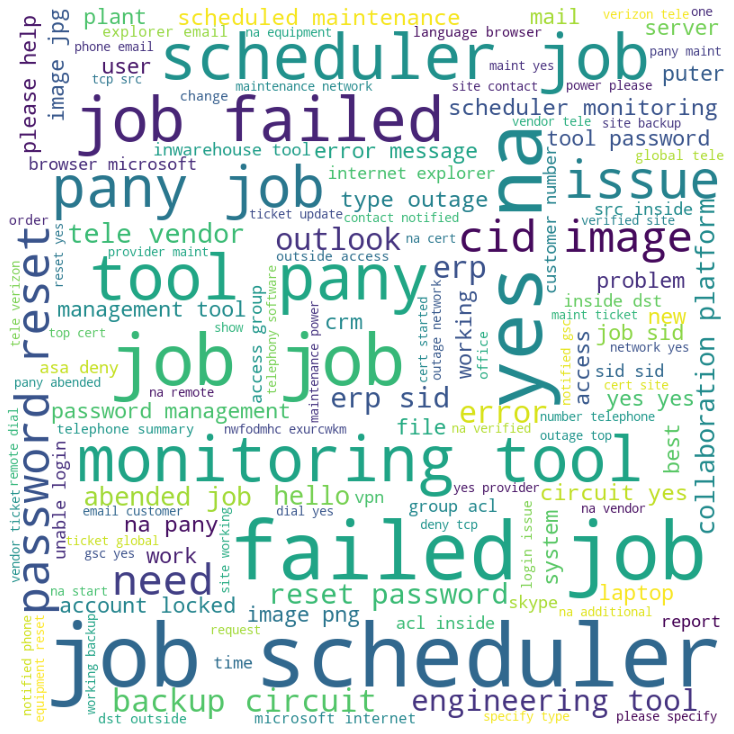

In [153]:
#Lets look at the WordCloud of the Complete Description before cleaning the dataset 

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
description_words = ''
stopwords = set(STOPWORDS)
for val in df.Complete_Description:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()    
    description_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(description_words)
                     
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

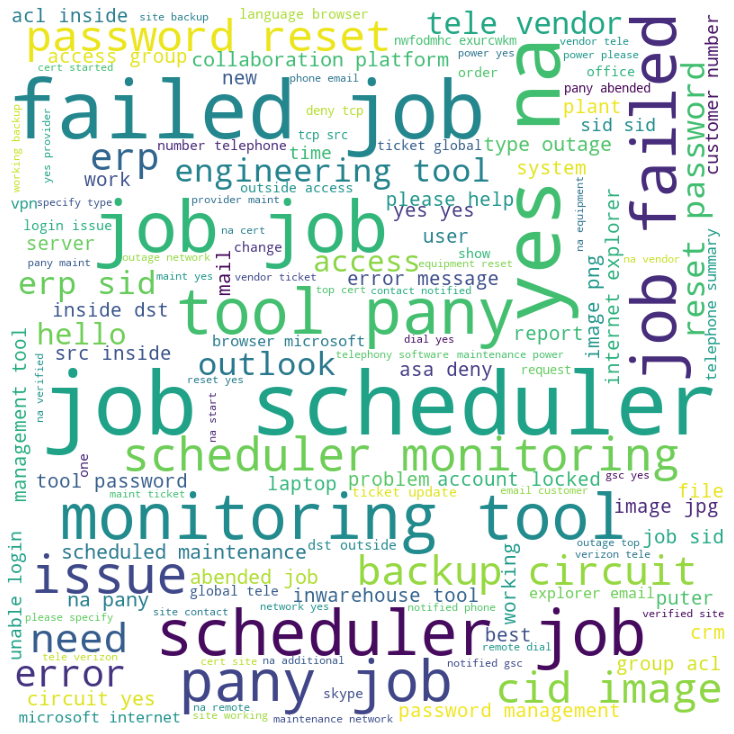

In [154]:
#Lets look at the WordCloud of the Complete Description after combining & cleaning the dataset
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
description_words = ''
stopwords = set(STOPWORDS)
for val in df1.Combined_Description:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()    
    description_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(description_words)
                     
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

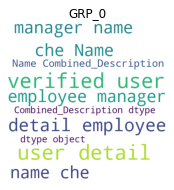

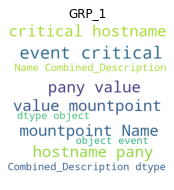

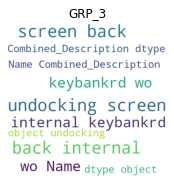

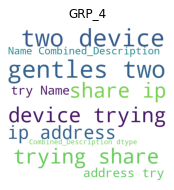

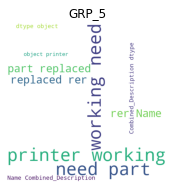

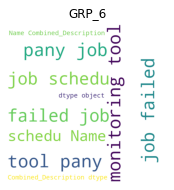

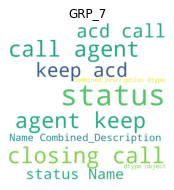

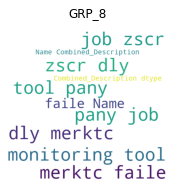

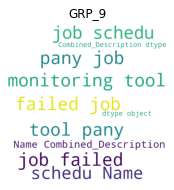

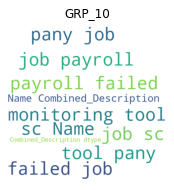

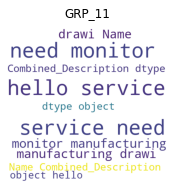

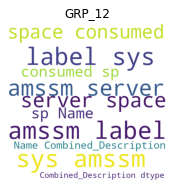

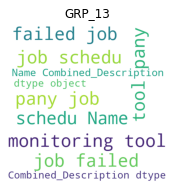

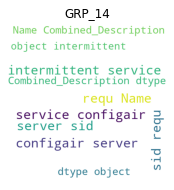

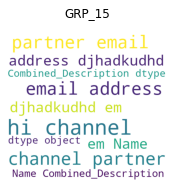

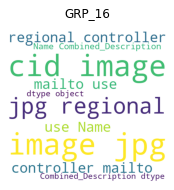

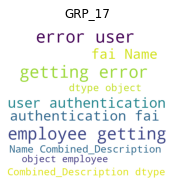

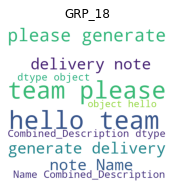

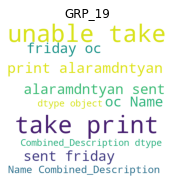

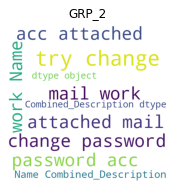

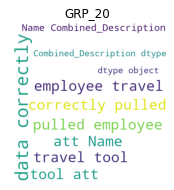

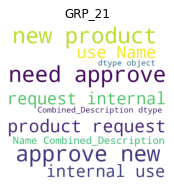

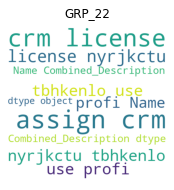

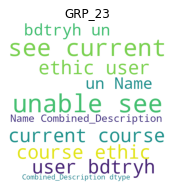

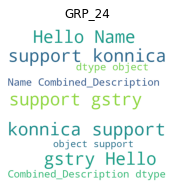

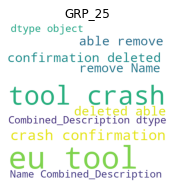

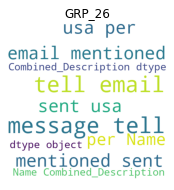

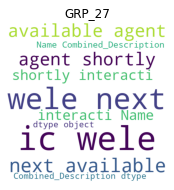

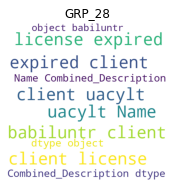

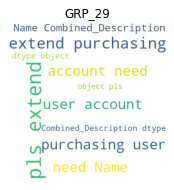

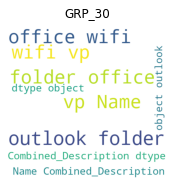

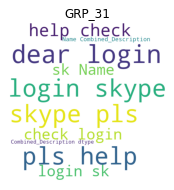

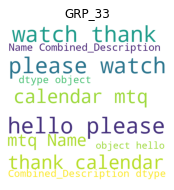

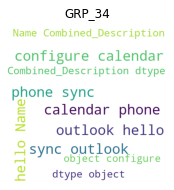

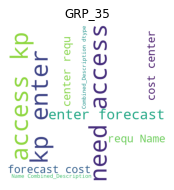

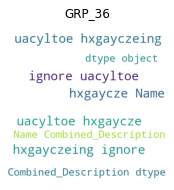

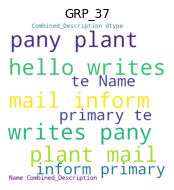

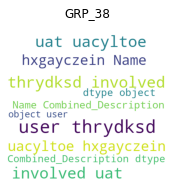

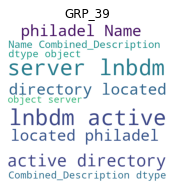

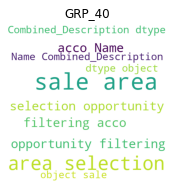

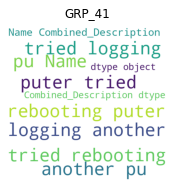

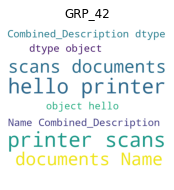

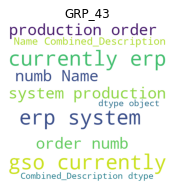

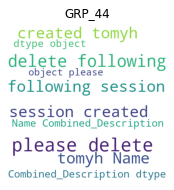

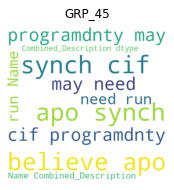

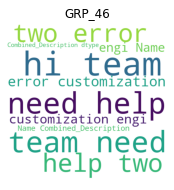

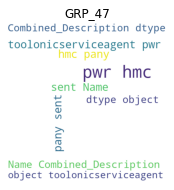

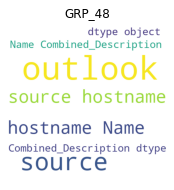

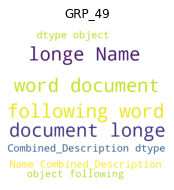

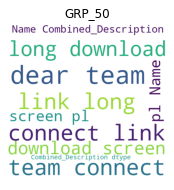

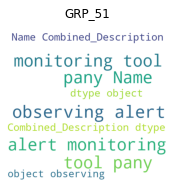

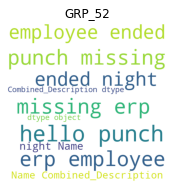

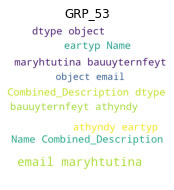

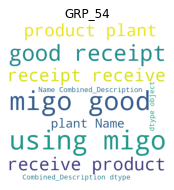

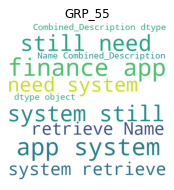

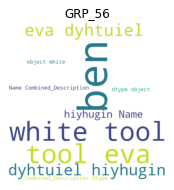

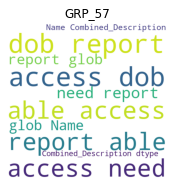

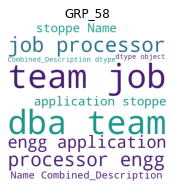

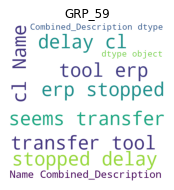

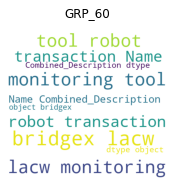

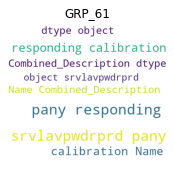

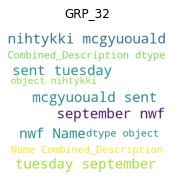

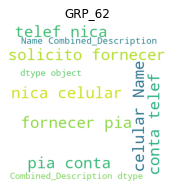

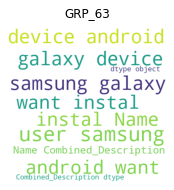

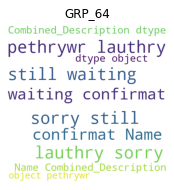

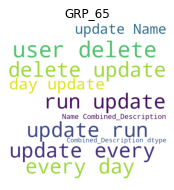

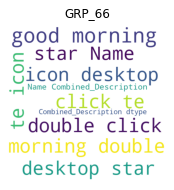

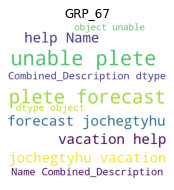

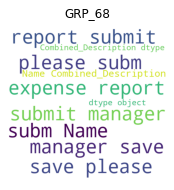

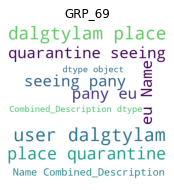

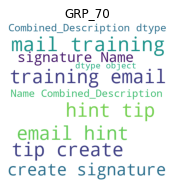

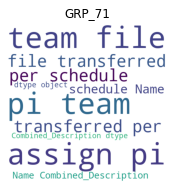

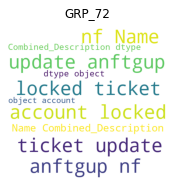

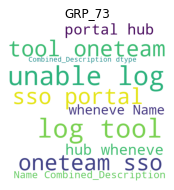

In [155]:
#Let us look at the WordCloud of indiviual groups

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
for grp in df1['Assignment group']:
  description_words = ''
  stopwords = set(STOPWORDS)
  val = df1.Combined_Description[df1['Assignment group'] == grp]
  val = str(val)
  tokens = val.split()
  for i in range(len(tokens)):
     tokens[i] = tokens[i].lower()    
     description_words += " ".join(tokens)+" "
  
  wordcloud = WordCloud(width = 500, height = 500,
                  background_color ='white',
                  stopwords = stopwords, max_words=10,
                  min_font_size = 5).generate(description_words)
                
  plt.figure(figsize = (3, 3), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.title(grp)
  plt.tight_layout(pad=2)
  plt.show()



In [156]:
df1.head()

Assignment group  ... word_count
0            GRP_0  ...      51818
1            GRP_1  ...        709
2            GRP_3  ...       4345
3            GRP_4  ...       2737
4            GRP_5  ...       2570

[5 rows x 4 columns]

In [157]:
df1['Combined_Groups'] = df1['Assignment group']

In [159]:
# #Combination of groups 

# Group_A (4, 8)
# Group_B (10, 47, 5, 6, 9, 60) 
# Group_C (50, 69)
# Group_D (7, 65)
# Group_E (3, 12, 2)
# Group_F (19, 56)


In [160]:
df1['Combined_Groups'] = df1['Combined_Groups'].replace( {'GRP_4': 'GRP_A','GRP_8': 'GRP_A', 'GRP_10': 'GRP_B', 'GRP_47': 'GRP_B', 'GRP_5': 'GRP_B', 'GRP_6': 'GRP_B', 'GRP_9': 'GRP_B', 'GRP_60': 'GRP_B' 
                                                          , 'GRP_50': 'GRP_C', 'GRP_69': 'GRP_C', 'GRP_7': 'GRP_D', 'GRP_65': 'GRP_D'
                                                          , 'GRP_3': 'GRP_E', 'GRP_12': 'GRP_E', 'GRP_2': 'GRP_E'
                                                          , 'GRP_19': 'GRP_F', 'GRP_56': 'GRP_F'})

In [161]:
df1['Combined_Groups'].unique()

array(['GRP_0', 'GRP_1', 'GRP_E', 'GRP_A', 'GRP_B', 'GRP_D', 'GRP_11',
       'GRP_13', 'GRP_14', 'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18',
       'GRP_F', 'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24',
       'GRP_25', 'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30',
       'GRP_31', 'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37',
       'GRP_38', 'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43',
       'GRP_44', 'GRP_45', 'GRP_46', 'GRP_48', 'GRP_49', 'GRP_C',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_57',
       'GRP_58', 'GRP_59', 'GRP_61', 'GRP_32', 'GRP_62', 'GRP_63',
       'GRP_64', 'GRP_66', 'GRP_67', 'GRP_68', 'GRP_70', 'GRP_71',
       'GRP_72', 'GRP_73'], dtype=object)

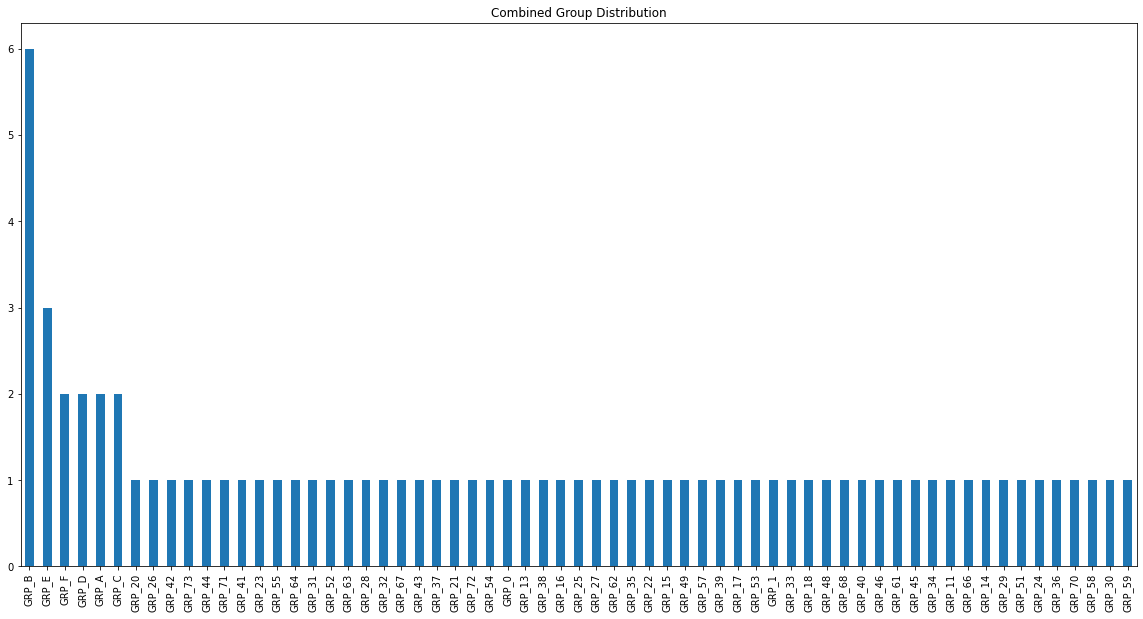

In [162]:
# Assignment group distribution

df1['Combined_Groups'].value_counts().plot(kind='bar', figsize=(20,10), title='Combined Group Distribution');